Data Preprocessing


In [7]:
# Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# Load dataset
file_path = "AirQualityUCI.csv"
df = pd.read_csv(file_path, sep=';', decimal=',')

In [9]:
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN


In [10]:
# Drop empty unnamed columns
df = df.dropna(axis=1, how='all')

In [11]:
# Combine Date and Time into DateTime
df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], errors='coerce', dayfirst=True)


/tmp/ipython-input-1973543556.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], errors='coerce', dayfirst=True)


In [12]:
# Drop original Date and Time
df.drop(['Date','Time'], axis=1, inplace=True)

In [13]:
# Replace -200 (missing values) with NaN
df.replace(-200, np.nan, inplace=True)

In [14]:
# Handle missing values (forward fill)
df.fillna(method='ffill', inplace=True)

/tmp/ipython-input-3997509181.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [16]:
print(df.columns.tolist())


['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH', 'DateTime']


In [20]:
# Clean column names (remove spaces just in case)
df.columns = df.columns.str.strip()


In [22]:
# Select available features
features = ['CO(GT)', 'NO2(GT)', 'C6H6(GT)', 'T', 'RH']
df = df[features + ['DateTime']]


In [24]:
# Compute simplified AQI category using CO, NO2, and Benzene (C6H6)
def compute_aqi(row):
    if row['CO(GT)'] <= 2 and row['NO2(GT)'] <= 50 and row['C6H6(GT)'] <= 5:
        return "Good"
    elif row['CO(GT)'] <= 5 and row['NO2(GT)'] <= 100 and row['C6H6(GT)'] <= 15:
        return "Moderate"
    else:
        return "Unhealthy"

df['AQI_Category'] = df.apply(compute_aqi, axis=1)


/tmp/ipython-input-1525321423.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['AQI_Category'] = df.apply(compute_aqi, axis=1)


In [25]:
# Encode target labels (Good=0, Moderate=1, Unhealthy=2)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['AQI_Label'] = le.fit_transform(df['AQI_Category'])


In [26]:
# Final dataset ready for ML
print(df.head())

   CO(GT)  NO2(GT)  C6H6(GT)     T    RH DateTime AQI_Category  AQI_Label
0     2.6    113.0      11.9  13.6  48.9      NaT    Unhealthy          2
1     2.0     92.0       9.4  13.3  47.7      NaT     Moderate          1
2     2.2    114.0       9.0  11.9  54.0      NaT    Unhealthy          2
3     2.2    122.0       9.2  11.0  60.0      NaT    Unhealthy          2
4     1.6    116.0       6.5  11.2  59.6      NaT    Unhealthy          2


In [27]:
# Class distribution
print("\nClass distribution:")
print(df['AQI_Category'].value_counts())


Class distribution:
AQI_Category
Unhealthy    5393
Moderate     3445
Good          633
Name: count, dtype: int64


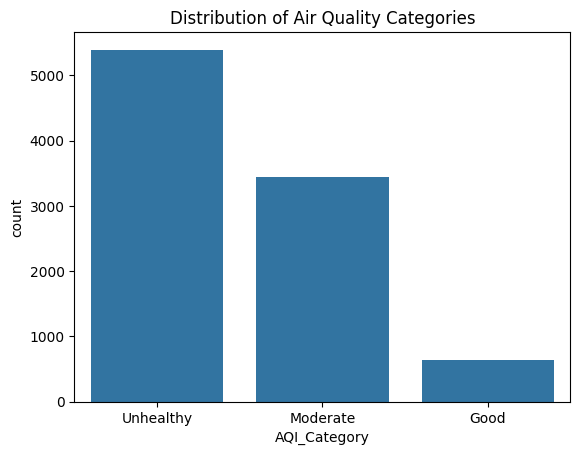

In [28]:
# Visualization
sns.countplot(x='AQI_Category', data=df)
plt.title("Distribution of Air Quality Categories")
plt.show()